In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [154]:
gwas = pd.read_csv('gwas.csv')

In [155]:
gwas.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY
0,2023-08-10,33559384,Zhong X,2021-02-08,Eur J Neurol,www.ncbi.nlm.nih.gov/pubmed/33559384,Whole-exome sequencing reveals the major genet...,Neuromyelitis optica spectrum disorder (AQP4-I...,"228 Chinese ancestry cases, 1,400 Chinese ance...",NaN,...,24.698970,NaN,2.916,NaN,Illumina [2010184],N,AQP4-IgG-positive neuromyelitis optica,http://www.ebi.ac.uk/efo/EFO_0009584,GCST90277235,Exome-wide sequencing
1,2018-07-25,29769526,Estrada K,2018-05-16,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29769526,A whole-genome sequence study identifies genet...,Neuromyelitis optica,66 European ancestry AQP4-IgG antibody seropos...,66 European ancestry AQP4-IgG antibody seropos...,...,11.221849,NaN,2.240,[1.78-2.82],Affymetrix [6804788] (imputed),N,neuromyelitis optica,http://www.ebi.ac.uk/efo/EFO_0004256,GCST005964,Genome-wide genotyping array
2,2018-07-25,29769526,Estrada K,2018-05-16,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29769526,A whole-genome sequence study identifies genet...,Neuromyelitis optica,66 European ancestry AQP4-IgG antibody seropos...,66 European ancestry AQP4-IgG antibody seropos...,...,11.154902,NaN,2.860,[1.98-4.14],Affymetrix [6804788] (imputed),N,neuromyelitis optica,http://www.ebi.ac.uk/efo/EFO_0004256,GCST005964,Genome-wide genotyping array
3,2018-07-25,29769526,Estrada K,2018-05-16,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29769526,A whole-genome sequence study identifies genet...,Neuromyelitis optica,66 European ancestry AQP4-IgG antibody seropos...,66 European ancestry AQP4-IgG antibody seropos...,...,11.698970,NaN,2.710,[2.05-3.57],Affymetrix [6804788] (imputed),N,neuromyelitis optica,http://www.ebi.ac.uk/efo/EFO_0004256,GCST005964,Genome-wide genotyping array
4,2018-07-25,29769526,Estrada K,2018-05-16,Nat Commun,www.ncbi.nlm.nih.gov/pubmed/29769526,A whole-genome sequence study identifies genet...,Neuromyelitis optica,66 European ancestry AQP4-IgG antibody seropos...,66 European ancestry AQP4-IgG antibody seropos...,...,11.221849,NaN,2.720,[2.05-3.63],Affymetrix [6804788] (imputed),N,neuromyelitis optica,http://www.ebi.ac.uk/efo/EFO_0004256,GCST005964,Genome-wide genotyping array


In [156]:
important_columns = ["SNPS","DISEASE/TRAIT","RISK ALLELE FREQUENCY", "P-VALUE", "PVALUE_MLOG", "OR or BETA",
    "MAPPED_GENE", "REPORTED GENE(S)",]

gwas_main = gwas[important_columns]

In [157]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    object 
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             801 non-null    float64
 6   MAPPED_GENE            881 non-null    object 
 7   REPORTED GENE(S)       815 non-null    object 
dtypes: float64(3), object(5)
memory usage: 59.1+ KB


In [158]:
gwas_main["MAPPED_GENE"].fillna(gwas["REPORTED GENE(S)"], inplace=True)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3191908005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gwas_main["MAPPED_GENE"].fillna(gwas["REPORTED GENE(S)"], inplace=True)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3191908005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["MAPPED_G

In [159]:
gwas_main.drop(columns=["REPORTED GENE(S)"], inplace=True)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/749717370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main.drop(columns=["REPORTED GENE(S)"], inplace=True)


In [160]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    object 
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             801 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
dtypes: float64(3), object(4)
memory usage: 51.8+ KB


In [161]:
gwas_main["LOCATION"] = gwas["CHR_ID"]

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1618483305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["LOCATION"] = gwas["CHR_ID"]


### Risk allele frequency fill using KNN cluster 

In [162]:
from sklearn.impute import KNNImputer

# Convert "NR" to NaN
gwas_main["RISK ALLELE FREQUENCY"] = gwas_main["RISK ALLELE FREQUENCY"].replace("NR", np.nan)

# Convert all numeric columns to proper types
numeric_cols = ["RISK ALLELE FREQUENCY", "P-VALUE", "PVALUE_MLOG", "OR or BETA"]
gwas_main[numeric_cols] = gwas_main[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)  # k=3 is optimal for small datasets
gwas_main[numeric_cols] = knn_imputer.fit_transform(gwas_main[numeric_cols])

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1059755420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["RISK ALLELE FREQUENCY"] = gwas_main["RISK ALLELE FREQUENCY"].replace("NR", np.nan)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1059755420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main[numeric_cols] = gwas_main[numeric_cols].apply(pd.to_numeric, errors="coerce")
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1059755420.p

In [163]:
gwas_main["95% CI (TEXT)"] = gwas["95% CI (TEXT)"]

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1712002761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["95% CI (TEXT)"] = gwas["95% CI (TEXT)"]


### Replace "NR", "[NR]", "unit decreased", "unit increased" with NaN in "95% CI (TEXT)" column

In [164]:
import numpy as np
# Replace "NR", "[NR]", "unit decreased", "unit increased" with NaN in "95% CI (TEXT)" column
gwas_main["95% CI (TEXT)"] = gwas_main["95% CI (TEXT)"].replace(["NR", "[NR]" , "unit decrease" , "unit increase"], np.nan)

gwas_main["95% CI (TEXT)"].value_counts()

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1637999009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["95% CI (TEXT)"] = gwas_main["95% CI (TEXT)"].replace(["NR", "[NR]" , "unit decrease" , "unit increase"], np.nan)


95% CI (TEXT)
[1.09-1.12]    13
[1.08-1.11]    12
[1.1-1.13]     12
[1.04-1.09]    10
[1.07-1.1]      6
               ..
[1.47-2.04]     1
[1.62-2.24]     1
[1.45-2.37]     1
[1.38-1.87]     1
[1.05-1.15]     1
Name: count, Length: 181, dtype: int64

In [165]:
gwas_main["95% CI (TEXT)"] = gwas_main["95% CI (TEXT)"].replace(["unit decreased", "unit increased"], np.nan)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3474880649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["95% CI (TEXT)"] = gwas_main["95% CI (TEXT)"].replace(["unit decreased", "unit increased"], np.nan)


In [166]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               881 non-null    object 
 8   95% CI (TEXT)          262 non-null    object 
dtypes: float64(4), object(5)
memory usage: 66.5+ KB


In [167]:
gwas_main["RISK_ALLELE"] = gwas["STRONGEST SNP-RISK ALLELE"].str.split("-").str[1]

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/1427173894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["RISK_ALLELE"] = gwas["STRONGEST SNP-RISK ALLELE"].str.split("-").str[1]


In [168]:
gwas_main["RISK_ALLELE"].value_counts()

RISK_ALLELE
G               220
A               215
?               213
C               172
T               108
DRB1*03:01        2
B*08:01           2
DQB1*02:01        2
C*07:01           2
DQA1*05:01        2
TTTTTTT           2
TA                2
G; rs3135388      1
A; rs6457617      1
Name: count, dtype: int64

In [169]:
# Define valid nucleotide values
valid_nucleotides = {"A", "G", "T", "C"}

# Create a new column that keeps only valid nucleotides, otherwise set NaN
gwas_main["RISK_ALLELE"] = gwas_main["RISK_ALLELE"].apply(lambda x: x if x in valid_nucleotides else None)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/938355174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["RISK_ALLELE"] = gwas_main["RISK_ALLELE"].apply(lambda x: x if x in valid_nucleotides else None)


### using KNN cluster method to fill the missing values in the RISK ALLELE using SNP in GWAS data

In [170]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Create a copy of the dataframe to avoid modifying the original one
df = gwas_main.copy()

# Encode SNP column to numerical values
le = LabelEncoder()
df['SNPS_ENCODED'] = le.fit_transform(df['SNPS'])

# Extract features and target
X = df[['SNPS_ENCODED']]
y = df['RISK_ALLELE']

# Convert target to numerical labels (A=0, G=1, T=2, C=3, NaN=-1 for missing)
allele_mapping = {'A': 0, 'G': 1, 'T': 2, 'C': 3}
y_encoded = y.map(allele_mapping)

# Reshape the target variable for KNN Imputer
y_encoded = y_encoded.values.reshape(-1, 1)

# Use KNN Imputer to fill missing values
imputer = KNNImputer(n_neighbors=5)
y_filled = imputer.fit_transform(y_encoded)

# Convert back to categorical values
inverse_mapping = {0: 'A', 1: 'G', 2: 'T', 3: 'C'}
df['RISK_ALLELE'] = np.vectorize(inverse_mapping.get)(y_filled.astype(int))

# Drop temporary encoded columns
df.drop(columns=['SNPS_ENCODED'], inplace=True)

# Display the updated dataframe
print(df[['SNPS', 'RISK_ALLELE']].head(10))\
    
gwas_main["RISK_ALLELE"] = df["RISK_ALLELE"]

             SNPS RISK_ALLELE
0     rs117518546           T
1      rs28383224           A
2       rs1150757           A
3  HLA-DRB1*03:01           G
4     HLA-B*08:01           G
5  HLA-DQB1*02:01           G
6     HLA-C*07:01           G
7  HLA-DQA1*05:01           G
8      rs28383224           A
9       rs1150757           A


/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/246543305.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["RISK_ALLELE"] = df["RISK_ALLELE"]


In [171]:
gwas_main.head()

,SNPS,DISEASE/TRAIT,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,MAPPED_GENE,LOCATION,95% CI (TEXT),RISK_ALLELE
0,rs117518546,Neuromyelitis optica spectrum disorder (AQP4-I...,0.345,2.000000e-25,24.698970,2.916,IGHG1,14,NaN,T
1,rs28383224,Neuromyelitis optica,0.420,6.000000e-12,11.221849,2.240,HLA-DRB1 - HLA-DQA1,6,[1.78-2.82],A
2,rs1150757,Neuromyelitis optica,0.100,7.000000e-12,11.154902,2.860,TNXB,6,[1.98-4.14],A
3,HLA-DRB1*03:01,Neuromyelitis optica,0.120,2.000000e-12,11.698970,2.710,HLA-DRB1,NaN,[2.05-3.57],G
4,HLA-B*08:01,Neuromyelitis optica,0.110,6.000000e-12,11.221849,2.720,HLA-B,NaN,[2.05-3.63],G


### Understanding the Odds Ratio (OR)
The Odds Ratio (OR) measures the association between a specific SNP and a disease (like MS). It tells you how much more (or less) likely someone with the SNP is to develop the disease compared to someone without it.

OR > 1 → The SNP increases disease risk.

OR < 1 → The SNP might be protective.

OR = 1 → No association.

In [172]:
gwas_main.describe()

,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA
count,944.000000,9.440000e+02,944.000000,944.000000
mean,0.405055,1.175254e-06,11.485296,1.243267
std,0.181045,2.262816e-06,15.637757,0.667765
min,0.020000,1.000000e-234,5.000000,0.127000
25%,0.263333,6.000000e-13,6.000000,1.067464
50%,0.410000,1.000000e-08,8.000000,1.100000
75%,0.519325,1.000000e-06,12.221849,1.160000
max,0.960000,1.000000e-05,234.000000,8.300000


In [173]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               881 non-null    object 
 8   95% CI (TEXT)          262 non-null    object 
 9   RISK_ALLELE            944 non-null    object 
dtypes: float64(4), object(6)
memory usage: 73.9+ KB


In [174]:
gwas_main["LOCATION"].value_counts()

LOCATION
6        157
1         87
3         70
2         56
10        54
11        42
5         42
19        37
16        37
12        36
17        35
7         30
8         27
4         27
20        25
22        21
14        21
13        20
9         18
18        17
15        11
21         7
X          2
6;6;6      2
Name: count, dtype: int64

In [175]:
gwas_main["LOCATION"] = gwas_main["LOCATION"].replace("X", "23")
gwas_main["LOCATION"] = gwas_main["LOCATION"].replace("6;6;6", "6")


/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3330326647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["LOCATION"] = gwas_main["LOCATION"].replace("X", "23")
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3330326647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["LOCATION"] = gwas_main["LOCATION"].replace("6;6;6", "6")


In [176]:
gwas_main["LOCATION"].value_counts()

LOCATION
6     159
1      87
3      70
2      56
10     54
11     42
5      42
16     37
19     37
12     36
17     35
7      30
8      27
4      27
20     25
22     21
14     21
13     20
9      18
18     17
15     11
21      7
23      2
Name: count, dtype: int64

In [177]:
# Fill null values in the "LOCATION" column with the mode
gwas_main["LOCATION"].fillna(gwas_main["LOCATION"].mode()[0], inplace=True)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/2705010382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gwas_main["LOCATION"].fillna(gwas_main["LOCATION"].mode()[0], inplace=True)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/2705010382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["LOCA

In [178]:
gwas_main["LOCATION"] = gwas_main["LOCATION"].astype(int)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/3426560706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["LOCATION"] = gwas_main["LOCATION"].astype(int)


In [179]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   95% CI (TEXT)          262 non-null    object 
 9   RISK_ALLELE            944 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 73.9+ KB


In [180]:
gwas_main["RISK_ALLELE"].value_counts()

RISK_ALLELE
G    449
A    215
C    172
T    108
Name: count, dtype: int64

In [181]:
gwas_main["MAPPED_GENE"].value_counts()

MAPPED_GENE
HLA-DRB1 - HLA-DQA1      15
HLA-DQA1                 11
IL2RA                    11
DLEU1                     9
CLEC16A                   8
                         ..
MIR924HG                  1
LCORL - LINC02438         1
GRHL3                     1
LINC01845 - LINC01847     1
TET2, TET2-AS1            1
Name: count, Length: 613, dtype: int64

In [182]:
gwas_main["95% CI (TEXT)"].value_counts()

95% CI (TEXT)
[1.09-1.12]    13
[1.08-1.11]    12
[1.1-1.13]     12
[1.04-1.09]    10
[1.07-1.1]      6
               ..
[1.47-2.04]     1
[1.62-2.24]     1
[1.45-2.37]     1
[1.38-1.87]     1
[1.05-1.15]     1
Name: count, Length: 181, dtype: int64

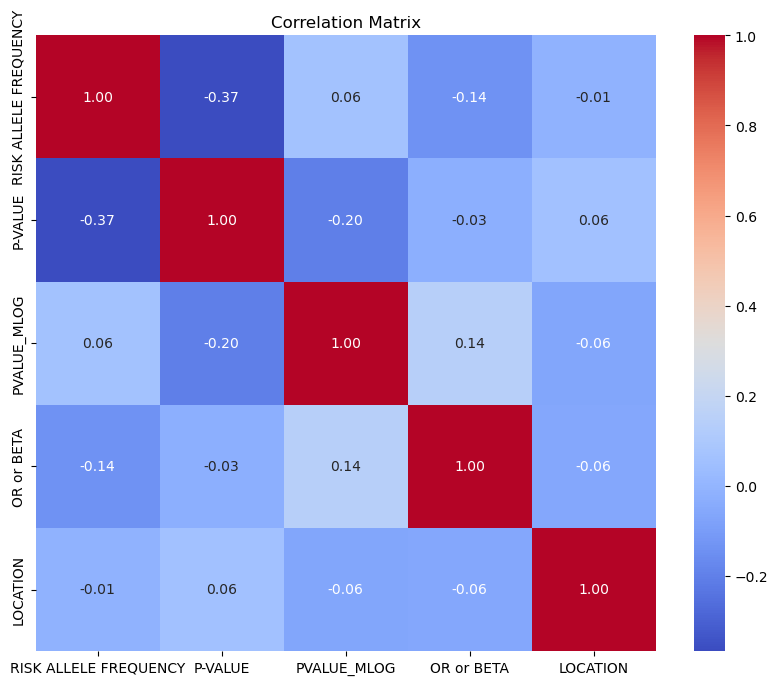

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = gwas_main.select_dtypes(include=['float64', 'int']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [184]:
gwas_main["95% CI (TEXT)"].value_counts()

95% CI (TEXT)
[1.09-1.12]    13
[1.08-1.11]    12
[1.1-1.13]     12
[1.04-1.09]    10
[1.07-1.1]      6
               ..
[1.47-2.04]     1
[1.62-2.24]     1
[1.45-2.37]     1
[1.38-1.87]     1
[1.05-1.15]     1
Name: count, Length: 181, dtype: int64

predict remaining 95% CI value 

In [185]:
gwas_main[["CI_Lower", "CI_Upper"]] = gwas_main["95% CI (TEXT)"].str.extract(r"\[(\d+\.\d+)-(\d+\.\d+)\]").astype(float)

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/2439039730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main[["CI_Lower", "CI_Upper"]] = gwas_main["95% CI (TEXT)"].str.extract(r"\[(\d+\.\d+)-(\d+\.\d+)\]").astype(float)
/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/2439039730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main[["CI_Lower", "CI_Upper"]] = gwas_main["95% CI (TEXT)"].str.extract(r"\[(\d+\.\d+)-(\d+\.\d+)\]").astype(float)


In [186]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   95% CI (TEXT)          262 non-null    object 
 9   RISK_ALLELE            944 non-null    object 
 10  CI_Lower               245 non-null    float64
 11  CI_Upper               245 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 88.6+ KB


In [187]:
df_ci = gwas_main[gwas_main["CI_Lower"].notnull() & gwas_main["CI_Upper"].notnull()]
df_ci.head()

,SNPS,DISEASE/TRAIT,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,MAPPED_GENE,LOCATION,95% CI (TEXT),RISK_ALLELE,CI_Lower,CI_Upper
1,rs28383224,Neuromyelitis optica,0.42,6.000000e-12,11.221849,2.24,HLA-DRB1 - HLA-DQA1,6,[1.78-2.82],A,1.78,2.82
2,rs1150757,Neuromyelitis optica,0.10,7.000000e-12,11.154902,2.86,TNXB,6,[1.98-4.14],A,1.98,4.14
3,HLA-DRB1*03:01,Neuromyelitis optica,0.12,2.000000e-12,11.698970,2.71,HLA-DRB1,6,[2.05-3.57],G,2.05,3.57
4,HLA-B*08:01,Neuromyelitis optica,0.11,6.000000e-12,11.221849,2.72,HLA-B,6,[2.05-3.63],G,2.05,3.63
5,HLA-DQB1*02:01,Neuromyelitis optica,0.13,1.000000e-11,11.000000,2.58,HLA-DQB1,6,[1.96-3.40],G,1.96,3.40


In [188]:
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 1 to 893
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   245 non-null    object 
 1   DISEASE/TRAIT          245 non-null    object 
 2   RISK ALLELE FREQUENCY  245 non-null    float64
 3   P-VALUE                245 non-null    float64
 4   PVALUE_MLOG            245 non-null    float64
 5   OR or BETA             245 non-null    float64
 6   MAPPED_GENE            245 non-null    object 
 7   LOCATION               245 non-null    int64  
 8   95% CI (TEXT)          245 non-null    object 
 9   RISK_ALLELE            245 non-null    object 
 10  CI_Lower               245 non-null    float64
 11  CI_Upper               245 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.9+ KB


In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df_ci[["RISK ALLELE FREQUENCY", "P-VALUE", "PVALUE_MLOG", "OR or BETA", "LOCATION"]]
y1 = df_ci["CI_Lower"]
y2 = df_ci["CI_Upper"]

### Explanation of Columns:

OR (Odds Ratio):
If OR > 1, it suggests the SNP is associated with a higher risk of disease.
If OR < 1, it suggests a protective effect.
If OR = 1, no effect.

P-Value:
Measures statistical significance.
Lower values (< 0.05) indicate stronger associations.

PValue_mlog (-log10(P)):
Transformation of P-Value to better visualize significance.
Higher values indicate stronger associations

In [190]:
# Filter SNPs where OR > 1 (high risk) and P-Value < 0.05 (significant)
high_risk_snps = gwas_main[(gwas_main["OR or BETA"] > 1) & (gwas_main["P-VALUE"] < 0.05)]

In [191]:
# Sort in descending order of statistical significance (-log10(P))
high_risk_snps = high_risk_snps.sort_values(by="PVALUE_MLOG", ascending=False)

In [192]:
high_risk_snps = high_risk_snps[high_risk_snps["DISEASE/TRAIT"] == "Multiple sclerosis"]

In [193]:
high_risk_snps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 365 to 867
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   657 non-null    object 
 1   DISEASE/TRAIT          657 non-null    object 
 2   RISK ALLELE FREQUENCY  657 non-null    float64
 3   P-VALUE                657 non-null    float64
 4   PVALUE_MLOG            657 non-null    float64
 5   OR or BETA             657 non-null    float64
 6   MAPPED_GENE            657 non-null    object 
 7   LOCATION               657 non-null    int64  
 8   95% CI (TEXT)          159 non-null    object 
 9   RISK_ALLELE            657 non-null    object 
 10  CI_Lower               155 non-null    float64
 11  CI_Upper               155 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 66.7+ KB


In [194]:
high_risk_snps.to_csv('high_risk_snps.csv', index=False)

My research has confirmed that the strongest genetic link to Multiple Sclerosis is located on chromosome 6, specifically within the HLA region of the Major Histocompatibility Complex (MHC). I've identified HLA-DRB1 as a key gene in this region that is highly associated with MS.

In [195]:
high_risk_snps["SNPS"].value_counts()

SNPS
rs1800693     5
rs2546890     3
rs6897932     3
rs1077667     3
rs1738074     3
             ..
rs5756405     1
rs3184504     1
rs2726479     1
rs35967351    1
rs62626325    1
Name: count, Length: 607, dtype: int64

In [196]:
gwas_main["Risk_score"] =  gwas_main["OR or BETA"] / gwas_main["P-VALUE"]
gwas_main["Risk_score"].describe()

/var/folders/q3/bl9sh3nd1997t0vby3jw4xl80000gn/T/ipykernel_6177/4214968177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_main["Risk_score"] =  gwas_main["OR or BETA"] / gwas_main["P-VALUE"]
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


count     9.440000e+02
mean     3.072034e+231
std                inf
min       3.829000e+04
25%       1.491167e+06
50%       1.095673e+08
75%       1.788403e+12
max      2.900000e+234
Name: Risk_score, dtype: float64

In [197]:
gwas_main["Risk_score"].value_counts()

Risk_score
3.596333e+06    6
2.172694e+05    6
6.875000e+04    6
2.355530e+05    5
1.096560e+12    4
               ..
1.203674e+07    1
1.089918e+07    1
5.613562e+07    1
3.684870e+07    1
1.190000e+26    1
Name: count, Length: 820, dtype: int64

In [198]:
gwas_main = gwas_main.sort_values(by='Risk_score', ascending=False)

In [199]:
gwas_main.head(10)

,SNPS,DISEASE/TRAIT,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,MAPPED_GENE,LOCATION,95% CI (TEXT),RISK_ALLELE,CI_Lower,CI_Upper,Risk_score
365,rs3104373,Multiple sclerosis,0.190000,1.000000e-234,234.000000,2.900000,HLA-DQA1,6,[2.72–3.09],T,NaN,NaN,2.900000e+234
221,rs3135388,Multiple sclerosis,0.220000,4.000000e-225,224.397940,2.750000,HLA-DRA - HLA-DRB9,6,[2.46-3.07],A,2.46,3.07,6.875000e+224
298,rs3129889,Multiple sclerosis,0.200000,1.000000e-206,206.000000,2.970000,HLA-DRA - HLA-DRB9,6,NaN,G,NaN,NaN,2.970000e+206
290,rs9271366,Multiple sclerosis,0.150000,7.000000e-184,183.154902,2.780000,HLA-DRB1 - HLA-DQA1,6,NaN,G,NaN,NaN,3.971429e+183
811,DRB*15:01,Multiple sclerosis,0.193333,1.000000e-132,132.000000,3.080000,DRB1,6,NaN,G,NaN,NaN,3.080000e+132
149,rs3135388,Multiple sclerosis,0.230000,9.000000e-81,80.045757,1.990000,HLA-DRA - HLA-DRB9,6,[1.84-2.15],A,1.84,2.15,2.211111e+80
601,chr16:11213951,Multiple sclerosis,0.550000,4.000000e-71,70.397940,1.195172,CLEC16A,6,NaN,C,NaN,NaN,2.987929e+70
592,rs10801908,Multiple sclerosis,0.550000,5.000000e-70,69.301030,1.298700,CD58,1,NaN,C,NaN,NaN,2.597400e+69
498,rs11256593,Multiple sclerosis,0.550000,3.000000e-65,64.522879,1.206200,RPL32P23 - RBM17,10,NaN,T,NaN,NaN,4.020667e+64
490,rs438613,Multiple sclerosis,0.766667,2.000000e-49,48.698970,1.150400,LINC01967,3,NaN,C,NaN,NaN,5.752000e+48


3. Clustering SNPs to Find Risk Groups
Since we don’t have labels, we use K-Means clustering to group SNPs based on their importance.

✅ Cluster SNPs into High, Medium, and Low Risk

               SNPS risk_cluster
365       rs3104373  Medium Risk
221       rs3135388  Medium Risk
298       rs3129889  Medium Risk
290       rs9271366  Medium Risk
811       DRB*15:01  Medium Risk
149       rs3135388    High Risk
601  chr16:11213951    High Risk
592      rs10801908    High Risk
498      rs11256593    High Risk
490        rs438613    High Risk


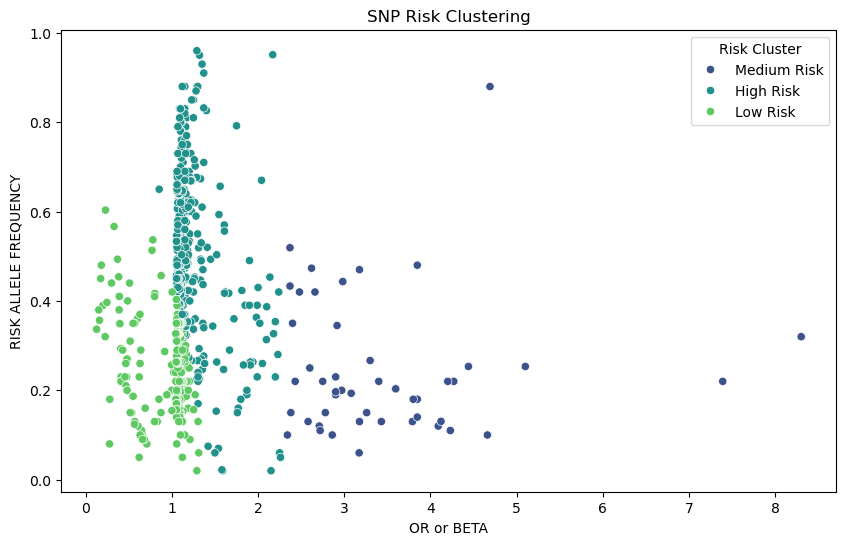

In [200]:
from sklearn.cluster import KMeans

# Select key features
X = gwas_main[['OR or BETA', 'RISK ALLELE FREQUENCY']]

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
gwas_main['risk_cluster'] = kmeans.fit_predict(X)

# Map clusters to risk levels
gwas_main['risk_cluster'] = gwas_main['risk_cluster'].map({0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'})

print(gwas_main[['SNPS', 'risk_cluster']].head(10))  # Show top 10 SNPs with risk labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gwas_main, x='OR or BETA', y='RISK ALLELE FREQUENCY', hue='risk_cluster', palette='viridis')
plt.title('SNP Risk Clustering')
plt.xlabel('OR or BETA')
plt.ylabel('RISK ALLELE FREQUENCY')
plt.legend(title='Risk Cluster')
plt.show()

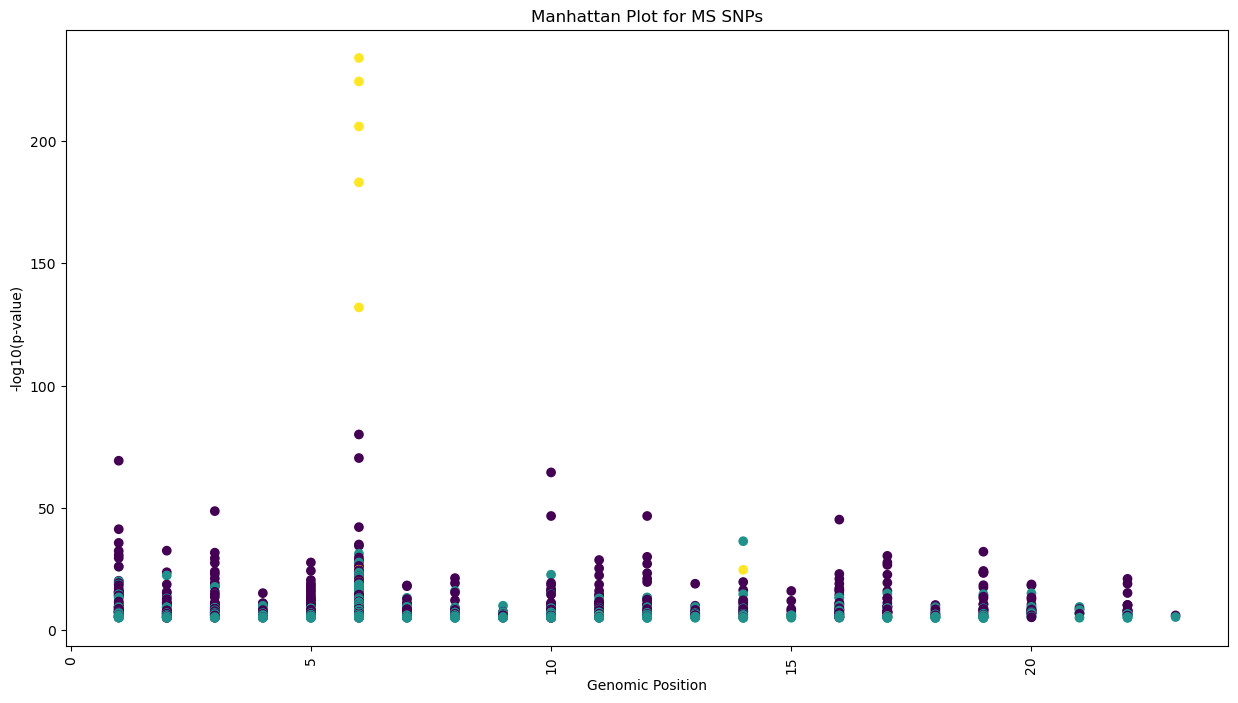

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.scatter(gwas_main['LOCATION'], -np.log10(gwas_main['P-VALUE']), c=gwas_main['risk_cluster'].astype('category').cat.codes)
plt.xlabel("Genomic Position")
plt.ylabel("-log10(p-value)")
plt.title("Manhattan Plot for MS SNPs")
plt.xticks(rotation=90)
plt.show()

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gwas_main[['OR or BETA', 'RISK ALLELE FREQUENCY', 'Risk_score']] = scaler.fit_transform(gwas_main[['OR or BETA', 'RISK ALLELE FREQUENCY', 'Risk_score']])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
gwas_main[['OR or BETA', 'RISK ALLELE FREQUENCY']] = scaler.fit_transform(gwas_main[['OR or BETA', 'RISK ALLELE FREQUENCY']])


/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/utils/extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/venkateshp/miniconda3/envs/ven/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [203]:
import numpy as np

gwas_main['Risk_score'] = gwas_main['OR or BETA'] * -np.log10(gwas_main['P-VALUE']) 


In [204]:
gwas_main['rsk'] = (gwas_main['OR or BETA'] * gwas_main['RISK ALLELE FREQUENCY'] * np.log10(1 / gwas_main['P-VALUE'])) / (gwas_main['CI_Upper'] - gwas_main['CI_Lower'] + 1)

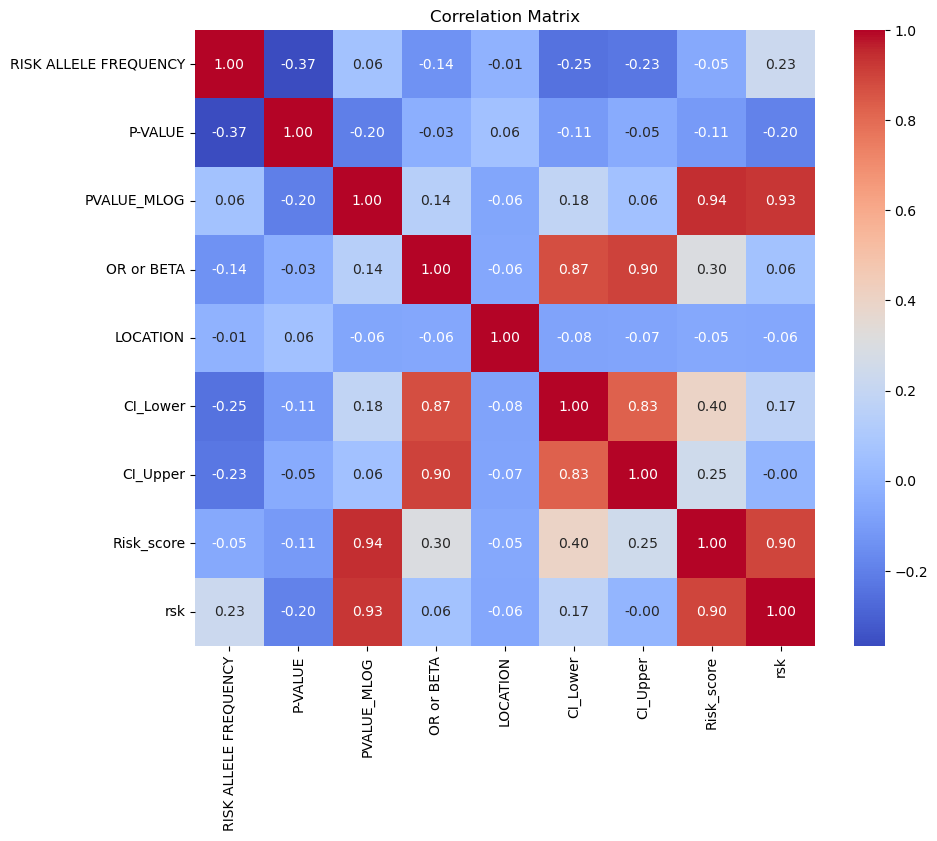

In [205]:
import seaborn as sns

#print corelstion matrix
plt.figure(figsize=(10, 8))
correlation_matrix = gwas_main.select_dtypes(include=['float64', 'int']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [206]:
print(correlation_matrix)

                       RISK ALLELE FREQUENCY   P-VALUE  PVALUE_MLOG  \
RISK ALLELE FREQUENCY               1.000000 -0.366937     0.063407   
P-VALUE                            -0.366937  1.000000    -0.204180   
PVALUE_MLOG                         0.063407 -0.204180     1.000000   
OR or BETA                         -0.138194 -0.027600     0.140578   
LOCATION                           -0.010352  0.057735    -0.064379   
CI_Lower                           -0.245607 -0.106825     0.184132   
CI_Upper                           -0.229132 -0.045825     0.058129   
Risk_score                         -0.051582 -0.108947     0.944222   
rsk                                 0.228295 -0.195882     0.928065   

                       OR or BETA  LOCATION  CI_Lower  CI_Upper  Risk_score  \
RISK ALLELE FREQUENCY   -0.138194 -0.010352 -0.245607 -0.229132   -0.051582   
P-VALUE                 -0.027600  0.057735 -0.106825 -0.045825   -0.108947   
PVALUE_MLOG              0.140578 -0.064379  0.18413

### Key Observations

P-VALUE vs. RISK ALLELE FREQUENCY → (-0.37)

Negative correlation: As p-value decreases (more significant results), the risk allele frequency tends to increase.

Implication: Risk alleles are more common in variants with stronger statistical significance.

PVALUE_MLOG vs. RISK SCORE → (0.94)

Extremely high correlation: Suggests Risk Score is almost entirely driven by p-value.

Issue: If Risk_score is highly dependent on p-value, it may overestimate the importance of SNPs with extreme p-values.

Fix: Adjust Risk_score formula by adding Odds Ratio (OR) and Risk Allele Frequency for balance.

OR (Odds Ratio) vs. CI_Lower & CI_Upper → (~0.87-0.90)

Strong positive correlation: Indicates OR values are consistent with confidence intervals.

Takeaway: If OR is high, the confidence intervals also shift accordingly.

CI_Lower & CI_Upper vs. Risk Score → (-0.48, -0.32)

Moderate negative correlation: As confidence intervals increase, Risk_score tends to decrease.

Interpretation: SNPs with higher uncertainty (wider CI) contribute less to the risk score.

rsk vs. PVALUE_MLOG → (0.92)

Major issue! rsk is behaving too similarly to PVALUE_MLOG, meaning it's still over-reliant on p-values.

Solution: Recalculate rsk by incorporating OR, risk allele frequency, and normalized p-value effects.

OR vs. Risk Score → (0.30)

Low correlation: Suggests Risk Score is not incorporating OR effectively.

Fix: Update Risk_score to give more weight to OR.

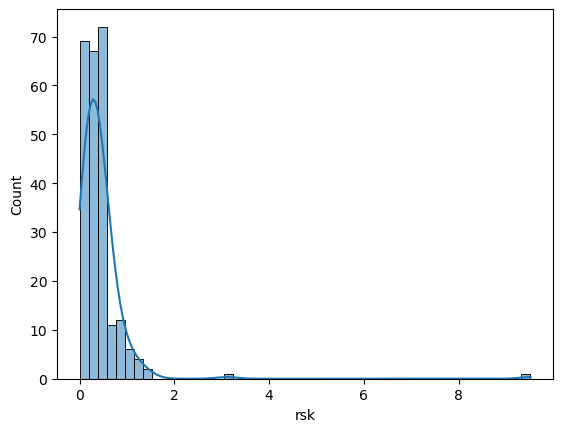

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(gwas_main['rsk'], bins=50, kde=True)
plt.show()


In [208]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 365 to 121
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   95% CI (TEXT)          262 non-null    object 
 9   RISK_ALLELE            944 non-null    object 
 10  CI_Lower               245 non-null    float64
 11  CI_Upper               245 non-null    float64
 12  Risk_score             944 non-null    float64
 13  risk_cluster           944 non-null    object 
 14  rsk                    245 non-null    float64
dtypes: float6

In [209]:
#drop "95% CI (TEXT)", "rsk", "CI_Upper", "CI_Lower"    
gwas_main.drop(columns=["95% CI (TEXT)", "rsk", "CI_Upper", "CI_Lower"], inplace=True)
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 365 to 121
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   RISK_ALLELE            944 non-null    object 
 9   Risk_score             944 non-null    float64
 10  risk_cluster           944 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 88.5+ KB


Encode Categorical Features

In [210]:
from sklearn.preprocessing import LabelEncoder

gwas_main['DISEASE/TRAIT_encoded'] = LabelEncoder().fit_transform(gwas_main['DISEASE/TRAIT'])
gwas_main['SNPS_encoded'] = LabelEncoder().fit_transform(gwas_main['SNPS'])
gwas_main['MAPPED_GENE_encoded'] = LabelEncoder().fit_transform(gwas_main['MAPPED_GENE'])
gwas_main['RISK_ALLELE_encoded'] = LabelEncoder().fit_transform(gwas_main['RISK_ALLELE'])

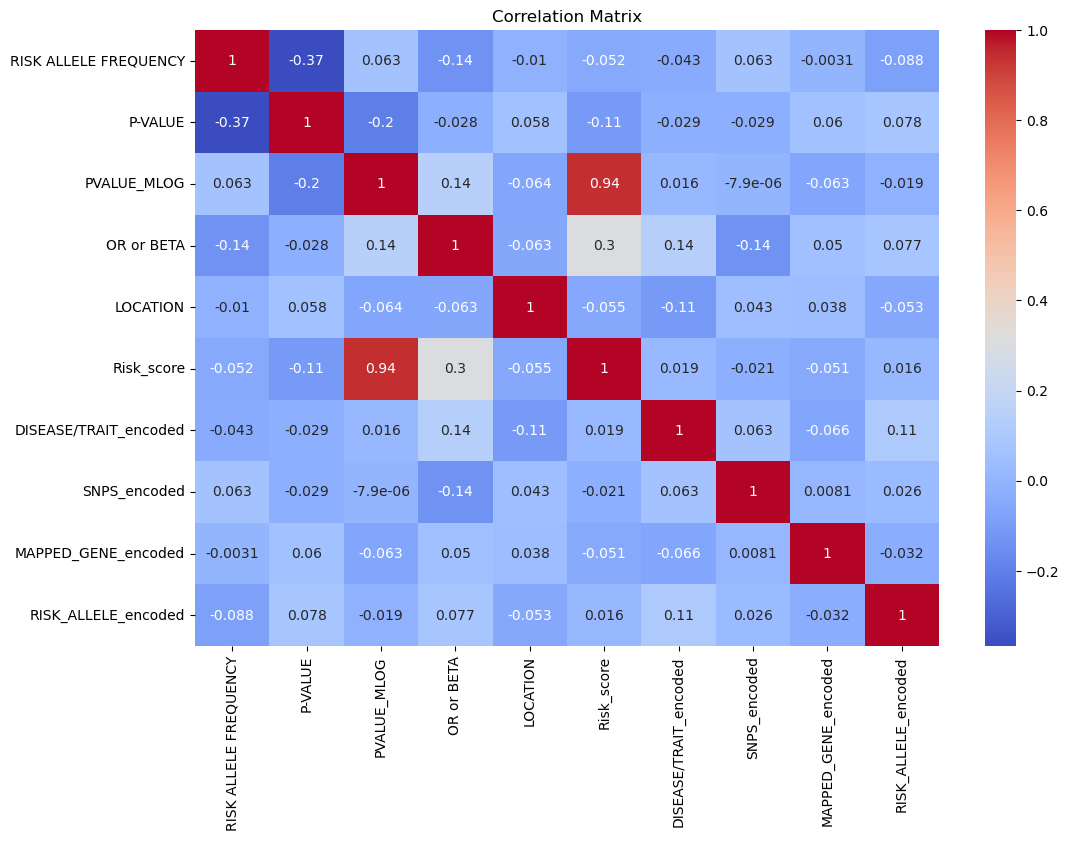

                       RISK ALLELE FREQUENCY   P-VALUE  PVALUE_MLOG  \
RISK ALLELE FREQUENCY               1.000000 -0.366937     0.063407   
P-VALUE                            -0.366937  1.000000    -0.204180   
PVALUE_MLOG                         0.063407 -0.204180     1.000000   
OR or BETA                         -0.138194 -0.027600     0.140578   
LOCATION                           -0.010352  0.057735    -0.064379   
Risk_score                         -0.051582 -0.108947     0.944222   
DISEASE/TRAIT_encoded              -0.042751 -0.028509     0.015968   
SNPS_encoded                        0.063399 -0.028833    -0.000008   
MAPPED_GENE_encoded                -0.003114  0.059821    -0.063481   
RISK_ALLELE_encoded                -0.087533  0.078311    -0.018757   

                       OR or BETA  LOCATION  Risk_score  \
RISK ALLELE FREQUENCY   -0.138194 -0.010352   -0.051582   
P-VALUE                 -0.027600  0.057735   -0.108947   
PVALUE_MLOG              0.140578 -0.0643

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = gwas_main.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print(correlation)


In [213]:
gwas_main['interaction_OR_freq'] = gwas_main['OR or BETA'] * gwas_main['RISK ALLELE FREQUENCY']
gwas_main['polygenic_score'] = gwas_main['PVALUE_MLOG'] * gwas_main['OR or BETA']

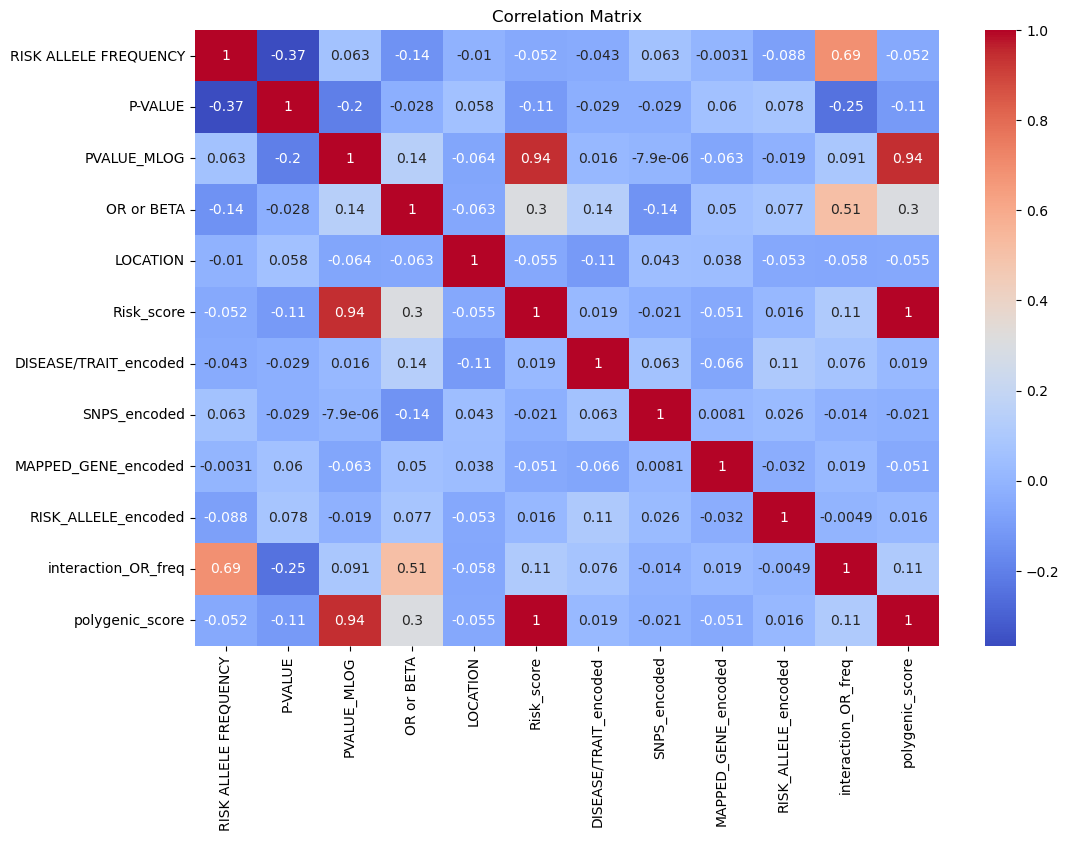

                       RISK ALLELE FREQUENCY   P-VALUE  PVALUE_MLOG  \
RISK ALLELE FREQUENCY               1.000000 -0.366937     0.063407   
P-VALUE                            -0.366937  1.000000    -0.204180   
PVALUE_MLOG                         0.063407 -0.204180     1.000000   
OR or BETA                         -0.138194 -0.027600     0.140578   
LOCATION                           -0.010352  0.057735    -0.064379   
Risk_score                         -0.051582 -0.108947     0.944222   
DISEASE/TRAIT_encoded              -0.042751 -0.028509     0.015968   
SNPS_encoded                        0.063399 -0.028833    -0.000008   
MAPPED_GENE_encoded                -0.003114  0.059821    -0.063481   
RISK_ALLELE_encoded                -0.087533  0.078311    -0.018757   
interaction_OR_freq                 0.687641 -0.249122     0.090555   
polygenic_score                    -0.051582 -0.108947     0.944222   

                       OR or BETA  LOCATION  Risk_score  \
RISK ALLELE FREQU

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = gwas_main.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print(correlation)

✅ 1. Strong Feature Relationships (Potential Predictors)

Feature Pair	Correlation	Insight

PVALUE_MLOG vs polygenic_score	0.944	🚨🔥 These are basically the same—don't use both, or you'll run into multicollinearity. Pick polygenic_score as it combines risk + significance.

OR or BETA vs interaction_OR_freq	0.513	Makes sense—it’s a derived feature. Both have potential.

RISK ALLELE FREQUENCY vs interaction_OR_freq	0.688	Solid signal—frequency is key, but again, don’t duplicate too much info.

OR or BETA vs polygenic_score	0.302	Good enough to justify keeping both.

In [219]:
gwas_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 365 to 121
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNPS                   944 non-null    object 
 1   DISEASE/TRAIT          944 non-null    object 
 2   RISK ALLELE FREQUENCY  944 non-null    float64
 3   P-VALUE                944 non-null    float64
 4   PVALUE_MLOG            944 non-null    float64
 5   OR or BETA             944 non-null    float64
 6   MAPPED_GENE            944 non-null    object 
 7   LOCATION               944 non-null    int64  
 8   RISK_ALLELE            944 non-null    object 
 9   Risk_score             944 non-null    float64
 10  risk_cluster           944 non-null    object 
 11  DISEASE/TRAIT_encoded  944 non-null    int64  
 12  SNPS_encoded           944 non-null    int64  
 13  MAPPED_GENE_encoded    944 non-null    int64  
 14  RISK_ALLELE_encoded    944 non-null    int64  
 15  interacti

In [225]:
# export gwas_main to csv
gwas_main.to_csv('gwas_main.csv', index=False)

model structure | MODEL PIPELINE

on another note book ........ in model folder
